In [247]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
from tensorflow.keras.applications import MobileNet


In [248]:
target_size = (128, 128)
batch_size = 16
CHANNELS = 3

In [249]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            'Train',
            shuffle = True,
            image_size = (target_size),
            batch_size = (batch_size)

    )

Found 6079 files belonging to 5 classes.


In [250]:
class_names = dataset.class_names
class_names

['basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'seborrheic keratosis',
 'squamous cell carcinoma']

[2 0 3 3 1 0 4 0 0 1 4 1 1 0 0 0]


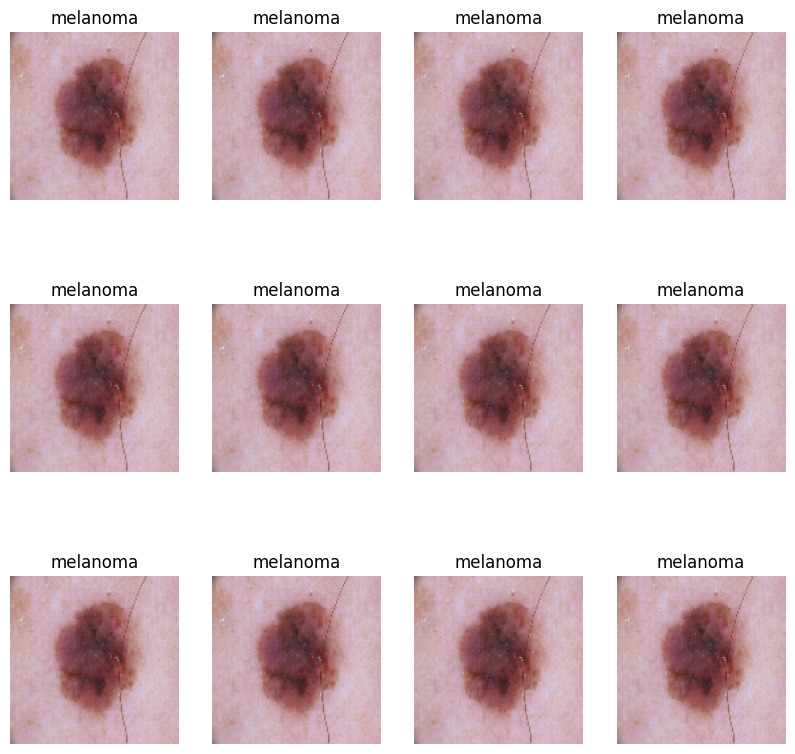

In [251]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(label_batch.numpy())
    for i in range (12): 
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[0].numpy().astype('uint8'))
     plt.axis('off')
     plt.title(class_names[label_batch[0]])

In [252]:
len(dataset)

380

In [253]:
37*32

1184

In [257]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def split_directory_data(directory, train_split=0.7, test_split=0.2, val_split=0.1, target_size=(150, 150), batch_size=32):
    # Initialize an ImageDataGenerator with rescaling
    datagen = ImageDataGenerator(rescale=1./255)

    train_generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  # Change this according to your problem
        shuffle=True,
        seed=42
    )

    total_samples = len(train_generator.filenames)
    train_samples = int(total_samples * train_split)
    val_samples = int(total_samples * val_split)

    train_data_generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  # Change this according to your problem
        subset='training',
        shuffle=True,
        seed=42
    )

    val_data_generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  # Change this according to your problem
        subset='validation',
        shuffle=True,
        seed=42
    )

    test_data_generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',  # Change this according to your problem
        subset='validation',
        shuffle=True,
        seed=42
    )

    return train_data_generator, val_data_generator, test_data_generator


In [258]:
train_data_generator, val_data_generator, test_data_generator = dataset_splitting(dataset)

In [259]:
len(test_data_generator)

76

In [260]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [261]:

lr = 0.001  # Set your learning rate here
save_loc = 'preview/basal cell carcinoma'  # Set the path to save the model

mobile = MobileNet(
    include_top=False,
    input_shape=(128, 128, 3),
    pooling='max',
    weights='imagenet',
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.5
)

x = mobile.layers[-1].output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

for layer in model.layers:
    layer.trainable = True

model.compile(Adamax(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])



#callbacks = [checkpoint, lr_adjust]

In [262]:
#vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers of VGG16
#for layer in vgg16_base.layers:
 #   layer.trainable = False

In [263]:
#x = Flatten()(vgg16_base.output)
#x = Dense(128, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(128, activation='relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(5, activation='softmax')(x)
#model = Model(inputs=vgg16_base.input, outputs=predictions)

In [264]:
model.summary()
#layers.Dropout(rate=0.4),

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 64, 64, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 64, 64, 32)        128

In [265]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [266]:
history = model.fit(
    train_data_generator,
    batch_size=BATCH_SIZE,
    validation_data=val_data_generator,
    verbose=1,
    epochs=10,
)

Epoch 1/10
266/266 [==============================] - 139s 452ms/step - loss: 1.0282 - accuracy: 0.5880 - val_loss: 0.4217 - val_accuracy: 0.8388
Epoch 2/10
266/266 [==============================] - 131s 453ms/step - loss: 0.4692 - accuracy: 0.8209 - val_loss: 0.1832 - val_accuracy: 0.9375
Epoch 3/10
266/266 [==============================] - 130s 450ms/step - loss: 0.3180 - accuracy: 0.8907 - val_loss: 0.1228 - val_accuracy: 0.9720
Epoch 4/10
266/266 [==============================] - 133s 462ms/step - loss: 0.2253 - accuracy: 0.9225 - val_loss: 0.1128 - val_accuracy: 0.9589
Epoch 5/10
266/266 [==============================] - 131s 452ms/step - loss: 0.1601 - accuracy: 0.9474 - val_loss: 0.0644 - val_accuracy: 0.9819
Epoch 6/10
266/266 [==============================] - 130s 450ms/step - loss: 0.1517 - accuracy: 0.9514 - val_loss: 0.0703 - val_accuracy: 0.9868
Epoch 7/10
266/266 [==============================] - 131s 453ms/step - loss: 0.1323 - accuracy: 0.9593 - val_loss: 0.1053 -

In [267]:
#pip install pickle
#import pickle 

#with open('Test_accuracy_97','wb') as f:
 #   pickle.dump(model,f)

In [268]:
#import pickle 

#with open('10000_60_30_10_10epoch','rb') as f:
 # md = pickle.load(f)

In [269]:
model.evaluate(test_data_generator)

76/76 [==============================] - 18s 98ms/step - loss: 0.0678 - accuracy: 0.9819


[0.06779737770557404, 0.9819079041481018]

In [270]:
import matplotlib.pyplot as plt

# Assuming you have the dataset, model, class_names, etc. already defined
correct = 0
incorrect = 0
for i, (image_batch, label_batch) in enumerate(dataset.take(100)):
   # plt.imshow(image_batch[0].numpy().astype('uint8'))
   # plt.axis('off')
   # plt.title(class_names[label_batch[0]])
    
    prediction = model.predict(image_batch)
    array_str = prediction[0]

    valarray = [float(val) for val in array_str]
    maxval = max(valarray)
    predicted_index = valarray.index(maxval)
    
    predicted_class = class_names[predicted_index]
    actual_class = class_names[label_batch[0]]
    
 #   print("Predicted:", predicted_class)
  #  print("Actual:", actual_class)

    if predicted_class == actual_class:
      #  print("Correct")
        correct+=1
    else:
       # print("Incorrect")
        incorrect+=1
        
    #plt.show()
print(f'{correct} and {incorrect}')

1/1 [==============================] - 0s 114ms/step
100 and 0
